In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


<ErrorbarContainer object of 3 artists>

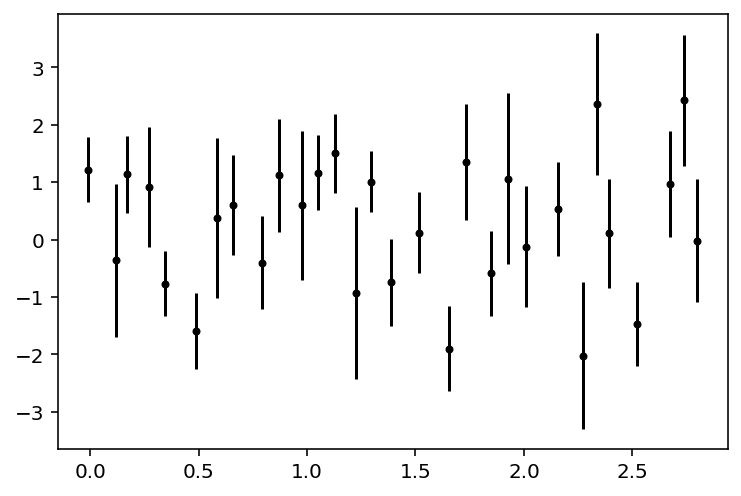

In [74]:
N = 30
ts = cumsum(0.1 + np.random.uniform(low=-0.05, high=0.05, size=N))-0.1

A_true = 1.2
B_true = 0.5
mu_true = 0.23

sigma = 1.0 + np.random.uniform(low=-0.5, high=0.5, size=len(ts))

ys_true = mu_true + A_true*cos(2*pi*ts) + B_true*sin(2*pi*ts)
ys = ys_true + sigma*randn(len(ts))

#plot(ts, ys_true, '.')
errorbar(ts, ys, yerr=sigma, fmt='.', color='k')

In [75]:
f_test = 1

A_matrix = column_stack((ones_like(ys), cos(2*pi*f_test*ts), sin(2*pi*f_test*ts)))

ytilde = ys / sigma
A_tilde = A_matrix / reshape(sigma, (len(ys), 1))

In [76]:
((mu, A, B), _, _, _) = np.linalg.lstsq(A_tilde, ytilde)

/Users/wfarr/anaconda3/envs/GBPyro/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


<ErrorbarContainer object of 3 artists>

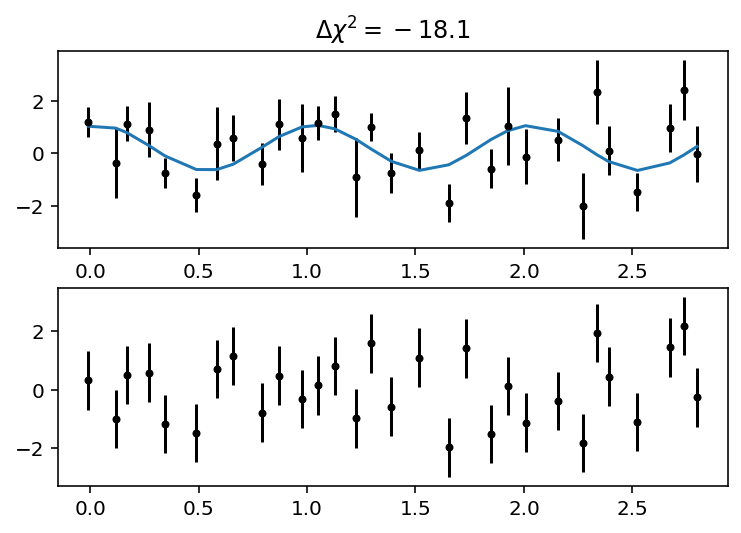

In [77]:
subplot(211)

errorbar(ts, ys, yerr=sigma, fmt='.', color='k')
plot(ts, np.dot(A_matrix, (mu, A, B)))

title(r'$\Delta \chi^2 = {:.1f}$'.format(np.sum(np.square((ys - np.dot(A_matrix, (mu, A, B)))/sigma)) - np.sum(np.square(ys/sigma))))

subplot(212)
errorbar(ts, (ys-np.dot(A_matrix, (mu, A, B)))/sigma, yerr=ones_like(ys), fmt='.', color='k')